In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
##Solve unbalanced Data 
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
## Model
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
#evaluation :
from sklearn.metrics import confusion_matrix, classification_report,f1_score,precision_score,accuracy_score,recall_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error, r2_score
#Deep learning
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

#load Model and Scaling data
import pickle





## Autism Spectrum Disorder


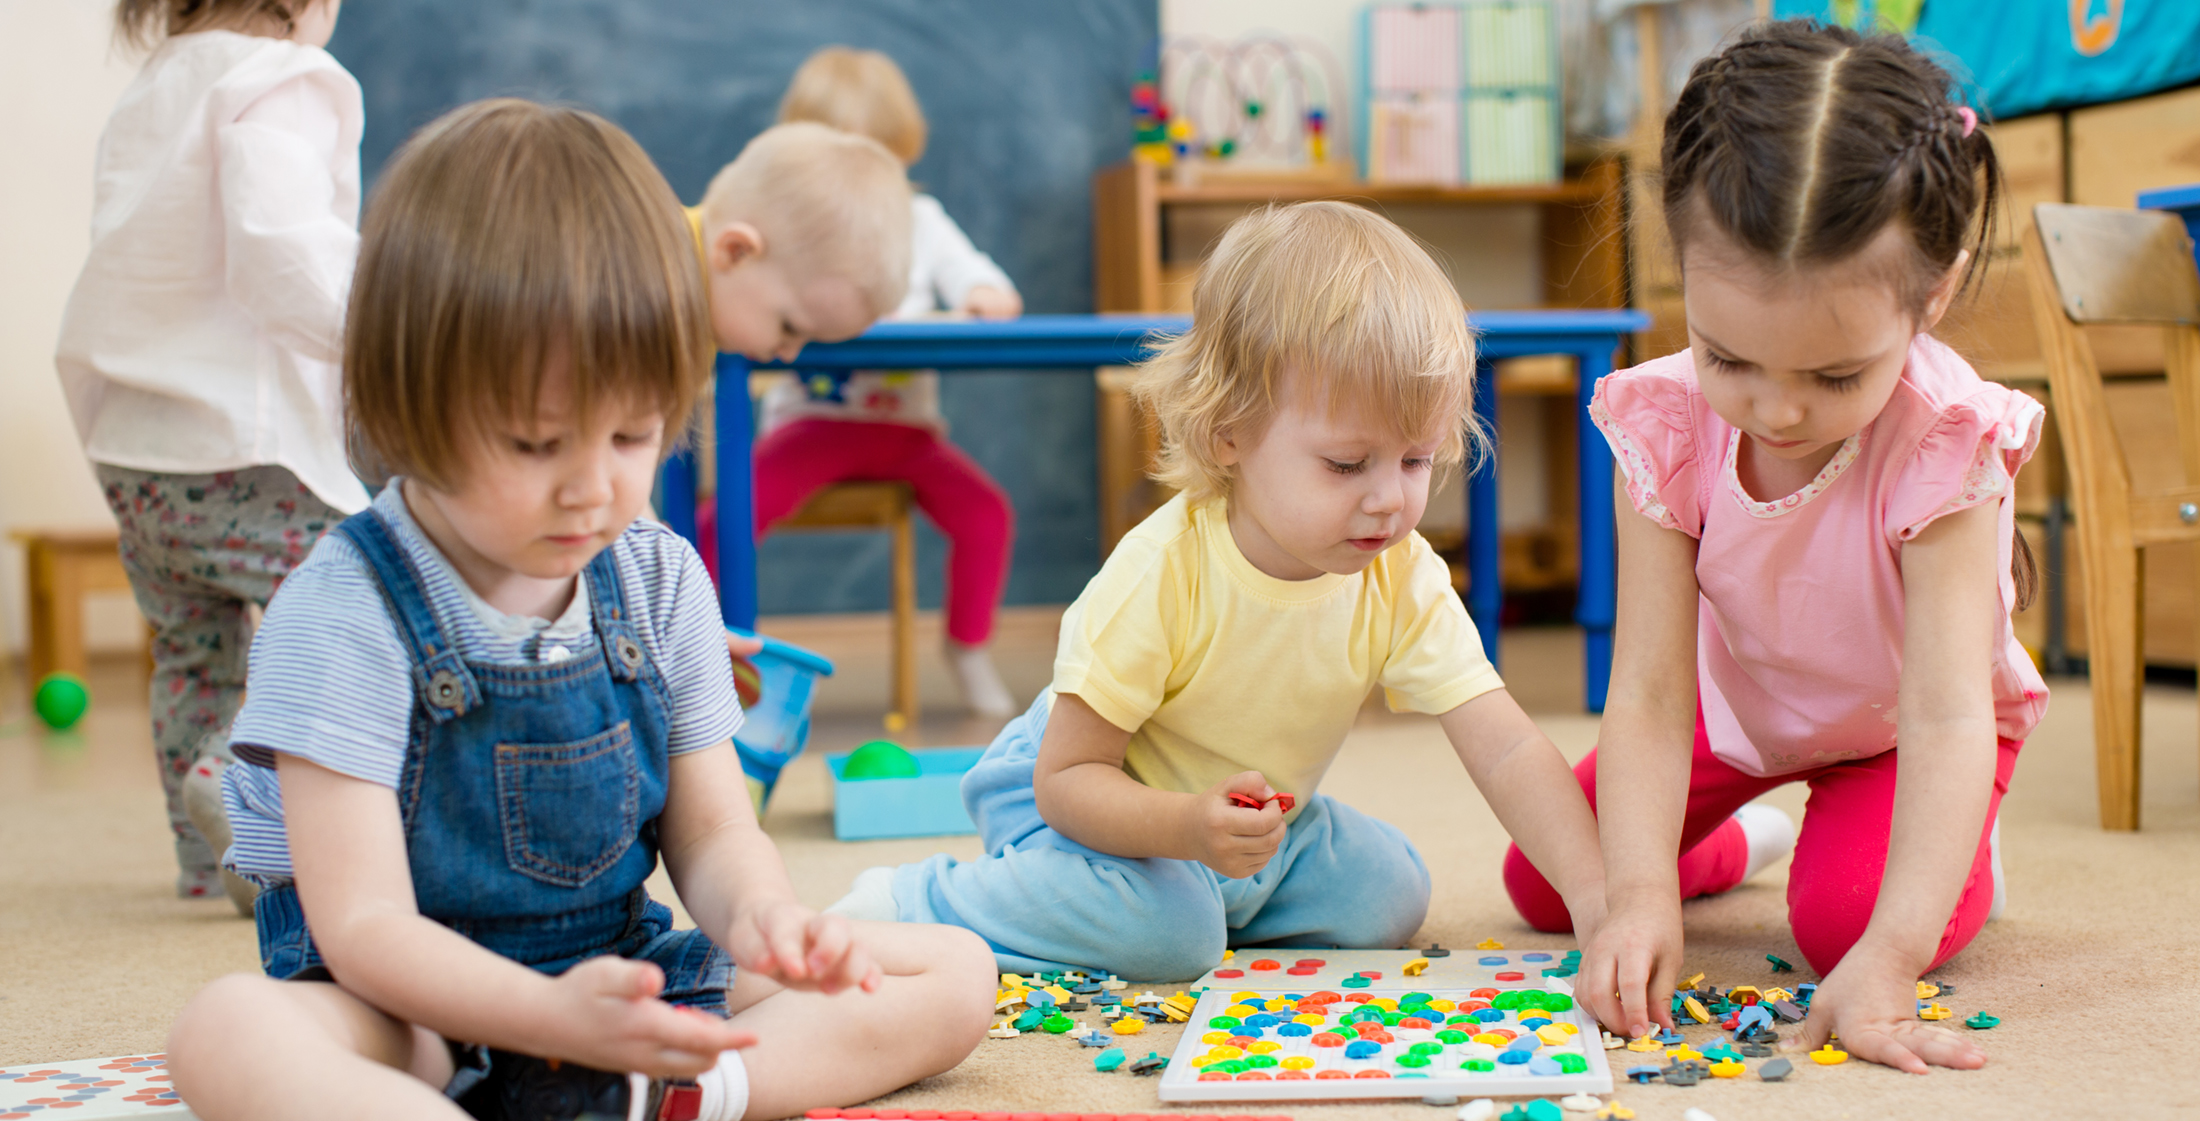

## Contributors


Our role in this project is to use machine learning techniques to diagnose ASD based on the Dr. Thabtah’s data.¶
Source of Data:## 

Fayez Thabtah

Department of Digital Technology Manukau Institute of Technology Auckland, New Zeland



## Core Behavioral Features
1.*AA1**: Does your child look at you when you call his/her name?  
2. **A2**: How easy is it for you to get eye contact with your child?  
3. **A3**: Does your child point to indicate that s/he wants something? (e.g., a toy that is out of reach)  
4. **A4**: Does your child point to share interest with you? (e.g., pointing at an interesting sight)  
5. **A5**: Does your child pretend? (e.g., care for dolls, talk on a toy phone)  
6. **A6**: Does your child follow where you’re looking?  
7. **A7**: If someone in the family is visibly upset, does your child show signs of wanting to comfort them? (e.g., stroking hair, giving them a hug)  
8. **A8**: Would you describe your child’s first words as...?  
9. **A9**: Does your child use simple gestures? (e.g., wave goodbye)  
10. **A10**: Does your child stare at nothing?  

## Demographic and Contextual Information
1. **Age**: The child’s age at the time of the screening.  
2. **Sex**: Gender of the child.  
3. **Ethnicity**: Ethnic background of the child.  
4. **Born with jaundice**: Whether the child had neonatal jaundice.  
5. **Family member with ASD history**: Family history of Autism Spectrum Disorder.  
6. **Who is completing the test**: The relationship of the respondent to the child (e.g., parent, guardian, teacher).  
7. **Why_are_you_taken_the_screening**: The reason for taking the screening (e.g., concern, routine check-up).  

## Outcome Variable
- **Class variable**: The final classification (e.g., likelihood of ASD diagnosis, severity level, or other outcomes).

## Additional Information
- **Score by Q-chat-10**: A calculated score based on the responses to the core behavioral questions (Q-chat-10 screening tool). It is likely used to assess the level of risk for ASD.

Class variable 
at nothing with no apparent purpose? 


## Read Data

In [7]:
df=pd.read_csv('Dataset/Toddler Autism dataset July .csv')
df.head()


,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


## check Data Type

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

## All Data are valid Data type

## To know the dimension of our data¶


In [12]:
df.shape

(1054, 19)

In [13]:
def column_info(df):
   cols=[]
   dtypes=[]
   unique_v=[]
   n_unique_v=[]

   for col in df.columns:
       cols.append(col)
       dtypes.append(df[col].dtype.name)
       unique_v.append(df[col].unique())
       n_unique_v.append(df[col].nunique())
   return pd.DataFrame({'names':cols,'types':dtypes,'unique': unique_v,'n_unique_v':n_unique_v})  

In [14]:
column_info(df)

,names,types,unique,n_unique_v
0,Case_No,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1054
1,A1,int64,"[0, 1]",2
2,A2,int64,"[0, 1]",2
3,A3,int64,"[0, 1]",2
4,A4,int64,"[0, 1]",2
5,A5,int64,"[0, 1]",2
6,A6,int64,"[0, 1]",2
7,A7,int64,"[1, 0]",2
8,A8,int64,"[1, 0]",2
9,A9,int64,"[0, 1]",2


*******************************************************

## Analysis and Visualization 

*******************************************************

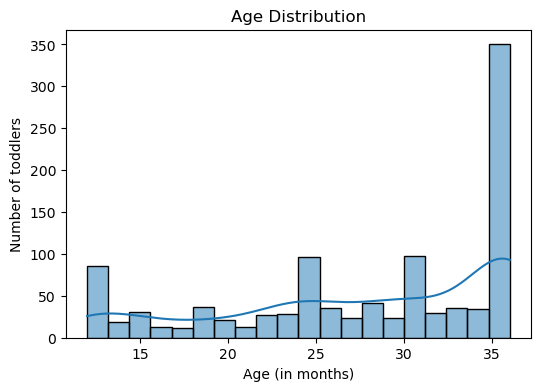

In [18]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Age_Mons'], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age (in months)")
plt.ylabel("Number of toddlers")
plt.show()

## Most of toddlers have 3 years  old 

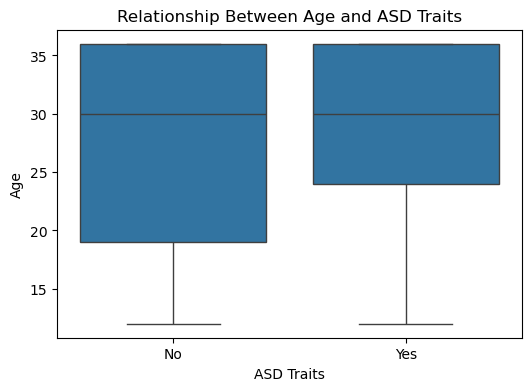

In [20]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Class/ASD Traits ', y='Age_Mons', data=df)
plt.title("Relationship Between Age and ASD Traits")
plt.xlabel("ASD Traits")
plt.ylabel("Age")
plt.show()

## IF the toddlers become between 25 and 30 month We can determine whether he is suffering or not

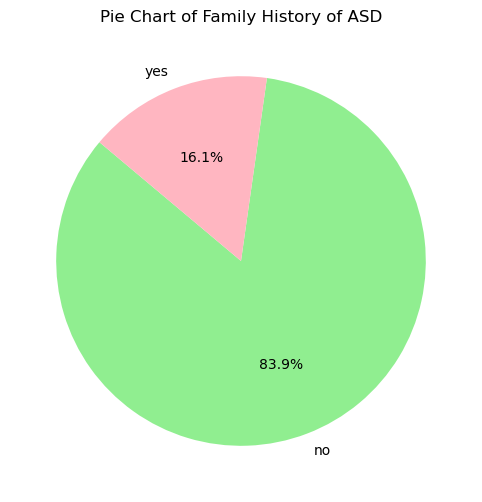

In [22]:
plt.figure(figsize=(10, 6))
family_history_counts = df['Family_mem_with_ASD'].value_counts()
plt.pie(family_history_counts, labels=family_history_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightpink'])
plt.title("Pie Chart of Family History of ASD")
plt.show()

## Most of the family of toddlers are not have autism disease

In [24]:
df.columns = df.columns.str.strip()

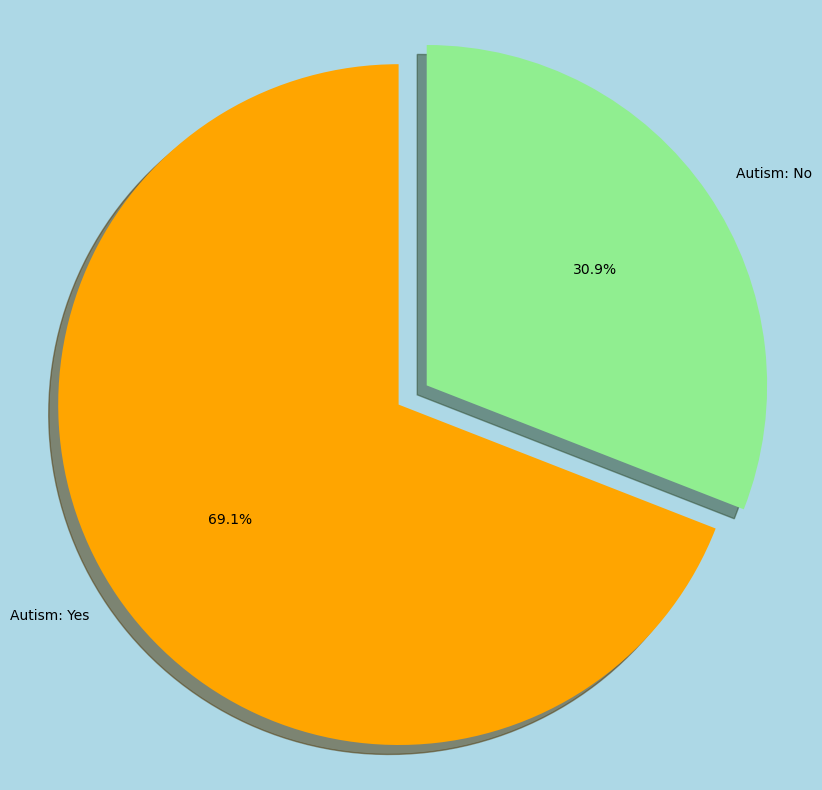

In [25]:
fig = plt.gcf()
fig.set_size_inches(10, 10)
fig.set_facecolor('lightblue')

colors = ['orange', 'lightgreen']

plt.pie(df["Class/ASD Traits"].value_counts(), labels=('Autism: Yes', 'Autism: No'), explode=[0.1, 0],
        autopct='%1.1f%%', shadow=True, startangle=90, labeldistance=1.1, colors=colors)

plt.axis('equal')

plt.show()

## You notice that the dataset is unblanced data

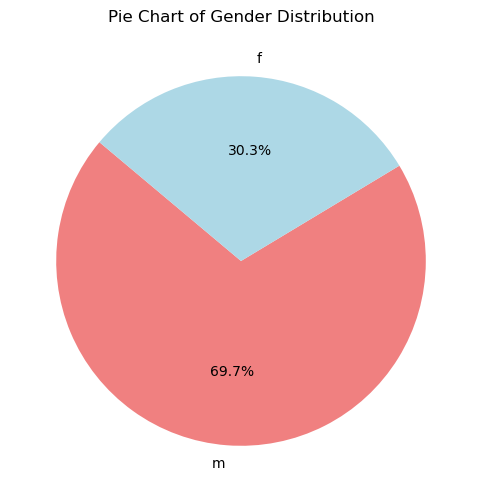

In [27]:
plt.figure(figsize=(10, 6))
gender_counts = df['Sex'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightblue'])
plt.title("Pie Chart of Gender Distribution")
plt.show()

In [28]:
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits'],
      dtype='object')

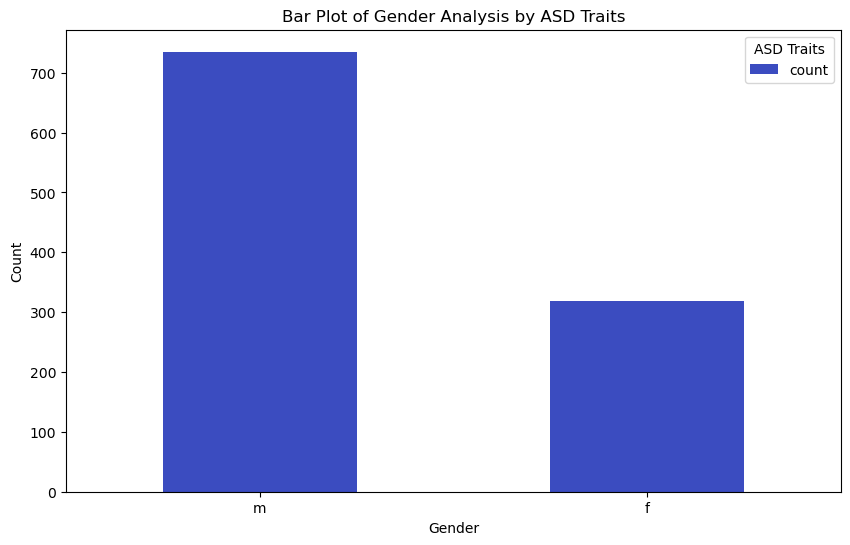

In [29]:
gender_target_counts=df['Sex'].value_counts()
gender_target_counts.plot(kind='bar', figsize=(10, 6), colormap='coolwarm')
plt.title("Bar Plot of Gender Analysis by ASD Traits")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="ASD Traits")
plt.show()

## Most of Case of Data is Male

In [31]:
df.groupby(['Sex', 'Class/ASD Traits']).size().unstack()


Class/ASD Traits,No,Yes
Sex,,
f,125,194
m,201,534


In [32]:
df.groupby(['Family_mem_with_ASD', 'Class/ASD Traits']).size().unstack()


Class/ASD Traits,No,Yes
Family_mem_with_ASD,,
no,271,613
yes,55,115


In [33]:
df['Class/ASD Traits'].value_counts()


Class/ASD Traits
Yes    728
No     326
Name: count, dtype: int64

In [34]:
df.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


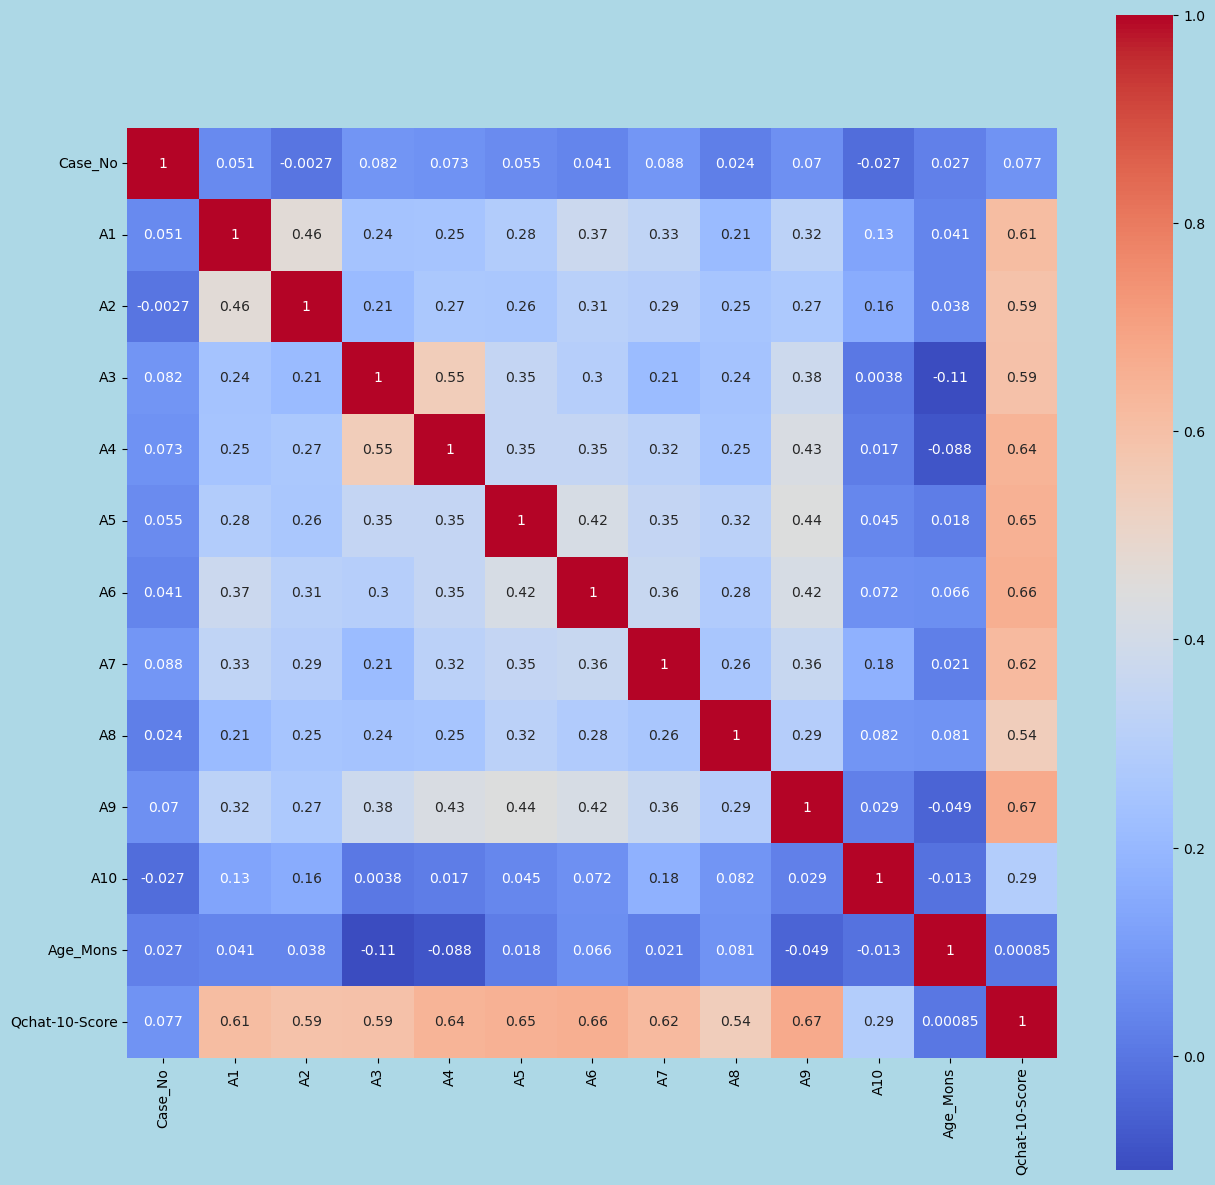

In [35]:
corr = df.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(15, 15))

fig.set_facecolor('lightblue')

sns.heatmap(data=corr, annot=True, square=True, cbar=True, cmap='coolwarm', ax=ax)

plt.show()

**********************************

## Preprocessing

*******************************

## Check duplicated Raw 

In [40]:
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits'],
      dtype='object')

In [41]:
df.duplicated().sum()

0

## 
It seems to you that the data does not has duplicated raw But in fact that the column Case_No is the reason for the hidden of duplicated raw we should drop it because it is reason for many problem such that the model overfit .....



## Drop irrelevant columns


In [44]:
df.drop(columns=['Case_No', 'Qchat-10-Score', 'Who completed the test', 'Ethnicity'], axis=1,inplace=True)

## After drop "Case_No" column then check the duplicated raw 

In [46]:
df.duplicated().sum()

143

## Drop duplicated raw

In [48]:
df.drop_duplicates(inplace=True)


In [49]:
df.duplicated().sum()

0

In [50]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,f,yes,no,No
1,1,1,0,0,0,1,1,0,0,0,36,m,yes,no,Yes
2,1,0,0,0,0,0,1,1,0,1,36,m,yes,no,Yes
3,1,1,1,1,1,1,1,1,1,1,24,m,no,no,Yes
4,1,1,0,1,1,1,1,1,1,1,20,f,no,yes,Yes


In [51]:
df.reset_index(inplace=True)


In [52]:
df.head()

,index,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,0,0,0,0,0,0,0,1,1,0,1,28,f,yes,no,No
1,1,1,1,0,0,0,1,1,0,0,0,36,m,yes,no,Yes
2,2,1,0,0,0,0,0,1,1,0,1,36,m,yes,no,Yes
3,3,1,1,1,1,1,1,1,1,1,1,24,m,no,no,Yes
4,4,1,1,0,1,1,1,1,1,1,1,20,f,no,yes,Yes


In [53]:
df.drop("index",axis=1,inplace=True)

In [54]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,f,yes,no,No
1,1,1,0,0,0,1,1,0,0,0,36,m,yes,no,Yes
2,1,0,0,0,0,0,1,1,0,1,36,m,yes,no,Yes
3,1,1,1,1,1,1,1,1,1,1,24,m,no,no,Yes
4,1,1,0,1,1,1,1,1,1,1,20,f,no,yes,Yes


## Check for missing values

In [56]:
df.isnull().sum()

A1                     0
A2                     0
A3                     0
A4                     0
A5                     0
A6                     0
A7                     0
A8                     0
A9                     0
A10                    0
Age_Mons               0
Sex                    0
Jaundice               0
Family_mem_with_ASD    0
Class/ASD Traits       0
dtype: int64

 ## There is not missing data

## Check if there is outlier value

In [59]:
def detect_outliers(df):
    outlier_info = {}  

    numeric_columns = df.select_dtypes(include=['number']).columns

    for column in numeric_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        outlier_info[column] = {
            "lower_bound": lower_bound,
            "upper_bound": upper_bound,
            "outliers_count": len(outliers),
            "outliers_values": outliers[column].tolist()
        }
    
    return outlier_info

outlier_results = detect_outliers(df)

for col, details in outlier_results.items():
    print(f"Column: {col}")
    print(f"  Lower Bound: {details['lower_bound']}")
    print(f"  Upper Bound: {details['upper_bound']}")
    print(f"  Outliers Count: {details['outliers_count']}")
    print(f"  Outliers Values: {details['outliers_values']}")
    print("-" * 50)

Column: A1
  Lower Bound: -1.5
  Upper Bound: 2.5
  Outliers Count: 0
  Outliers Values: []
--------------------------------------------------
Column: A2
  Lower Bound: -1.5
  Upper Bound: 2.5
  Outliers Count: 0
  Outliers Values: []
--------------------------------------------------
Column: A3
  Lower Bound: -1.5
  Upper Bound: 2.5
  Outliers Count: 0
  Outliers Values: []
--------------------------------------------------
Column: A4
  Lower Bound: -1.5
  Upper Bound: 2.5
  Outliers Count: 0
  Outliers Values: []
--------------------------------------------------
Column: A5
  Lower Bound: -1.5
  Upper Bound: 2.5
  Outliers Count: 0
  Outliers Values: []
--------------------------------------------------
Column: A6
  Lower Bound: -1.5
  Upper Bound: 2.5
  Outliers Count: 0
  Outliers Values: []
--------------------------------------------------
Column: A7
  Lower Bound: -1.5
  Upper Bound: 2.5
  Outliers Count: 0
  Outliers Values: []
--------------------------------------------------

## Another way to detect outlier value

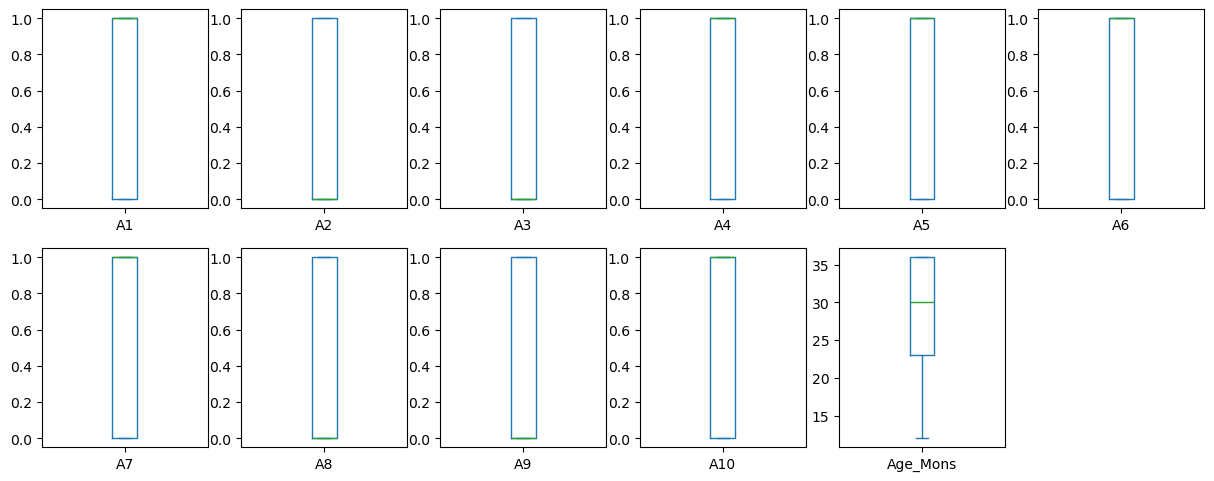

In [61]:
df.plot(kind = "box" , subplots = True , figsize = (15,15) , layout = (5,6))
plt.show()

## From 2 ways there are not outlier values

## Encoding

In [64]:
le = LabelEncoder()
df['Class/ASD Traits']=le.fit_transform(df['Class/ASD Traits'])
df['Class/ASD Traits'].value_counts()

Class/ASD Traits
1    655
0    256
Name: count, dtype: int64

In [65]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,f,yes,no,0
1,1,1,0,0,0,1,1,0,0,0,36,m,yes,no,1
2,1,0,0,0,0,0,1,1,0,1,36,m,yes,no,1
3,1,1,1,1,1,1,1,1,1,1,24,m,no,no,1
4,1,1,0,1,1,1,1,1,1,1,20,f,no,yes,1


In [66]:
df = pd.get_dummies(df, columns=['Sex', 'Jaundice', 'Family_mem_with_ASD'], drop_first=True)
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Class/ASD Traits,Sex_m,Jaundice_yes,Family_mem_with_ASD_yes
0,0,0,0,0,0,0,1,1,0,1,28,0,False,True,False
1,1,1,0,0,0,1,1,0,0,0,36,1,True,True,False
2,1,0,0,0,0,0,1,1,0,1,36,1,True,True,False
3,1,1,1,1,1,1,1,1,1,1,24,1,True,False,False
4,1,1,0,1,1,1,1,1,1,1,20,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,0,0,0,0,0,0,0,0,0,1,24,0,False,False,True
907,0,0,1,1,1,0,1,0,1,0,12,1,True,True,False
908,1,0,1,1,1,1,1,1,1,1,18,1,True,True,False
909,1,0,0,0,0,0,0,1,0,1,19,0,True,False,True


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   A1                       911 non-null    int64
 1   A2                       911 non-null    int64
 2   A3                       911 non-null    int64
 3   A4                       911 non-null    int64
 4   A5                       911 non-null    int64
 5   A6                       911 non-null    int64
 6   A7                       911 non-null    int64
 7   A8                       911 non-null    int64
 8   A9                       911 non-null    int64
 9   A10                      911 non-null    int64
 10  Age_Mons                 911 non-null    int64
 11  Class/ASD Traits         911 non-null    int32
 12  Sex_m                    911 non-null    bool 
 13  Jaundice_yes             911 non-null    bool 
 14  Family_mem_with_ASD_yes  911 non-null    bool 
dtypes: boo

In [68]:
df[['Sex_m', 'Jaundice_yes', 'Family_mem_with_ASD_yes']] = df[
    ['Sex_m', 'Jaundice_yes', 'Family_mem_with_ASD_yes']
].astype(int)

In [69]:
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Class/ASD Traits,Sex_m,Jaundice_yes,Family_mem_with_ASD_yes
0,0,0,0,0,0,0,1,1,0,1,28,0,0,1,0
1,1,1,0,0,0,1,1,0,0,0,36,1,1,1,0
2,1,0,0,0,0,0,1,1,0,1,36,1,1,1,0
3,1,1,1,1,1,1,1,1,1,1,24,1,1,0,0
4,1,1,0,1,1,1,1,1,1,1,20,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,0,0,0,0,0,0,0,0,0,1,24,0,0,0,1
907,0,0,1,1,1,0,1,0,1,0,12,1,1,1,0
908,1,0,1,1,1,1,1,1,1,1,18,1,1,1,0
909,1,0,0,0,0,0,0,1,0,1,19,0,1,0,1


In [70]:
df = df[[col for col in df.columns if col != 'Class/ASD Traits'] + ['Class/ASD Traits']]

In [71]:
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex_m,Jaundice_yes,Family_mem_with_ASD_yes,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,0,1,0,0
1,1,1,0,0,0,1,1,0,0,0,36,1,1,0,1
2,1,0,0,0,0,0,1,1,0,1,36,1,1,0,1
3,1,1,1,1,1,1,1,1,1,1,24,1,0,0,1
4,1,1,0,1,1,1,1,1,1,1,20,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,0,0,0,0,0,0,0,0,0,1,24,0,0,1,0
907,0,0,1,1,1,0,1,0,1,0,12,1,1,0,1
908,1,0,1,1,1,1,1,1,1,1,18,1,1,0,1
909,1,0,0,0,0,0,0,1,0,1,19,1,0,1,0


## Train test split

In [73]:
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Sex_m', 'Jaundice_yes', 'Family_mem_with_ASD_yes', 'Class/ASD Traits'],
      dtype='object')

In [74]:
x = df.drop(['Class/ASD Traits'], axis=1)
y = df['Class/ASD Traits']

In [75]:
y.value_counts()

Class/ASD Traits
1    655
0    256
Name: count, dtype: int64

In [76]:
Counter(y)

Counter({1: 655, 0: 256})

## Unbalnced Data :  solve it

In [79]:
undersample = RandomUnderSampler(sampling_strategy={1: 555}, random_state=42)

smote = SMOTE(sampling_strategy={0: 356}, random_state=42)

pipeline = Pipeline([
    ('under', undersample),
    ('over', smote)
])

x_resampled, y_resampled = pipeline.fit_resample(x, y)

print(Counter(y_resampled))

Counter({1: 555, 0: 356})


In [80]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)


## Scaling

In [82]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# Modeling and Evaluating 

In [84]:
def evaluate_model(y_test, y_pred):
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred)
    }
    return metrics

## LogisticRegression : Binary Classification


In [86]:
param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1],  
    'penalty': ['l2'], 
    'solver': ['liblinear']
}


grid_search = GridSearchCV(estimator=LogisticRegression(class_weight="balanced"),
                           param_grid=param_grid,
                           cv=10, 
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(x_train, y_train)

print("Best Parameters: ", grid_search.best_params_)

lr = grid_search.best_estimator_

y_pred_lr_te = lr.predict(x_test)

y_pred_lr_tr = lr.predict(x_train)


Fitting 10 folds for each of 5 candidates, totalling 50 fits
Best Parameters:  {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [87]:
lr_metrics=evaluate_model(y_test,y_pred_lr_te)
lr_metrics

{'accuracy': 1.0, 'recall': 1.0, 'precision': 1.0, 'f1_score': 1.0}

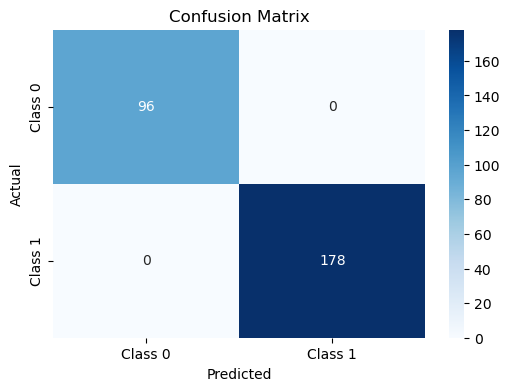

In [88]:
conf_matrix = confusion_matrix(y_test, y_pred_lr_te)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [89]:

print(classification_report(y_train, y_pred_lr_tr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       260
           1       1.00      1.00      1.00       377

    accuracy                           1.00       637
   macro avg       1.00      1.00      1.00       637
weighted avg       1.00      1.00      1.00       637



In [90]:

print(classification_report(y_test, y_pred_lr_te))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00       178

    accuracy                           1.00       274
   macro avg       1.00      1.00      1.00       274
weighted avg       1.00      1.00      1.00       274



C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
6 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1221, in fit
    self.coef_, 

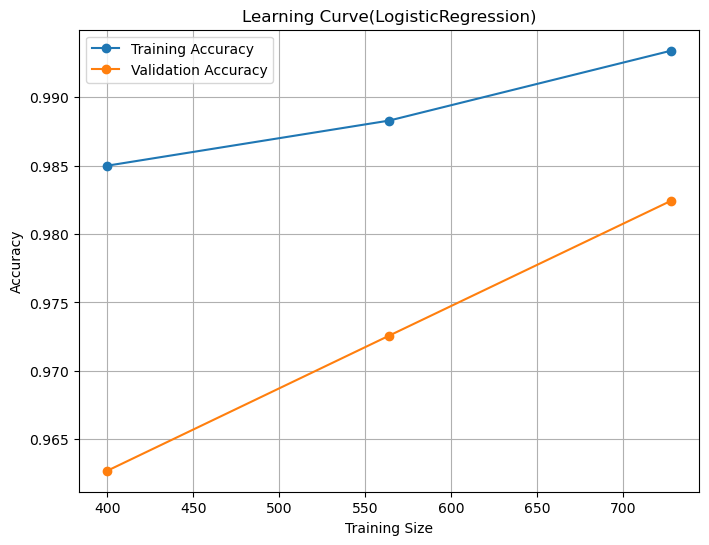

In [91]:

train_sizes, train_scores, test_scores = learning_curve(
    lr, x_resampled, y_resampled, cv=5, scoring='accuracy', n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curve(LogisticRegression)')
plt.grid()
plt.show()


## LinearDiscriminantAnalysis

In [93]:
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],  
    'shrinkage': [None, 'auto', 0.1, 0.5, 0.9]  
}

lda = LinearDiscriminantAnalysis()

grid_search = GridSearchCV(
    estimator=lda,
    param_grid=param_grid,
    cv=5,  
    scoring='accuracy',  
    n_jobs=-1,   
    verbose=1  
)

grid_search.fit(x_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
lda = grid_search.best_estimator_
y_pred_lda_test = lda.predict(x_test)

y_pred_lda_train = lda.predict(x_train)




Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Parameters:  {'shrinkage': 0.9, 'solver': 'lsqr'}


C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py", line 621, in fit
    raise NotImp

In [94]:
lda_metrics=evaluate_model(y_test,y_pred_lda_test)
lda_metrics

{'accuracy': 0.9635036496350365,
 'recall': 0.9438202247191011,
 'precision': 1.0,
 'f1_score': 0.9710982658959537}

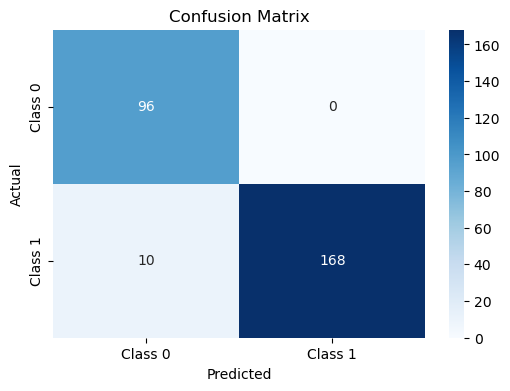

In [95]:
conf_matrix = confusion_matrix(y_test, y_pred_lda_test)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [96]:
print(classification_report(y_train, y_pred_lda_train))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       260
           1       1.00      0.93      0.96       377

    accuracy                           0.96       637
   macro avg       0.95      0.97      0.96       637
weighted avg       0.96      0.96      0.96       637



In [97]:
print(classification_report(y_test, y_pred_lda_test))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        96
           1       1.00      0.94      0.97       178

    accuracy                           0.96       274
   macro avg       0.95      0.97      0.96       274
weighted avg       0.97      0.96      0.96       274



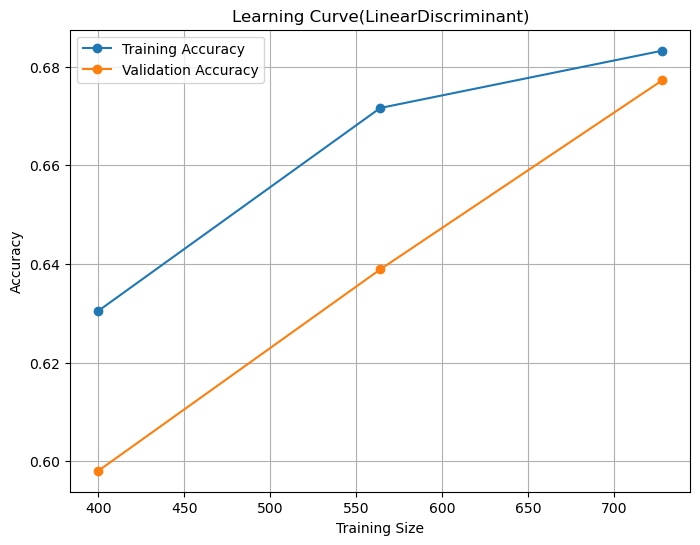

In [98]:

train_sizes, train_scores, test_scores = learning_curve(
    lda, x_resampled, y_resampled, cv=5, scoring='accuracy', n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curve(LinearDiscriminant)')
plt.grid()
plt.show()


## KNeighborsClassifier

In [100]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],       
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan', 'minkowski']  
}

knn = KNeighborsClassifier()

grid_search_knn = GridSearchCV(estimator=knn, 
                               param_grid=param_grid_knn, 
                               cv=5, 
                               scoring='accuracy', 
                               n_jobs=-1, 
                               verbose=1)

grid_search_knn.fit(x_train, y_train)

print("Best Parameters: ", grid_search_knn.best_params_)

knn = grid_search_knn.best_estimator_

y_pred_knn_test = knn.predict(x_test)

y_pred_knn_train = knn.predict(x_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters:  {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}


In [101]:
knn_metrics=evaluate_model(y_test,y_pred_knn_test)
knn_metrics

{'accuracy': 0.9708029197080292,
 'recall': 0.9606741573033708,
 'precision': 0.9941860465116279,
 'f1_score': 0.9771428571428571}

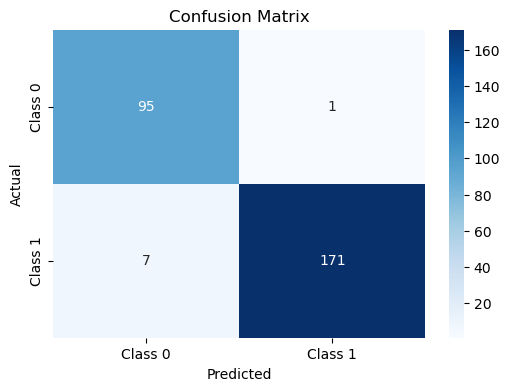

In [102]:
conf_matrix = confusion_matrix(y_test, y_pred_knn_test)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [103]:
print(classification_report(y_train, y_pred_knn_train))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       260
           1       0.99      0.94      0.96       377

    accuracy                           0.96       637
   macro avg       0.95      0.96      0.96       637
weighted avg       0.96      0.96      0.96       637



In [104]:
print(classification_report(y_test, y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        96
           1       0.99      0.96      0.98       178

    accuracy                           0.97       274
   macro avg       0.96      0.98      0.97       274
weighted avg       0.97      0.97      0.97       274



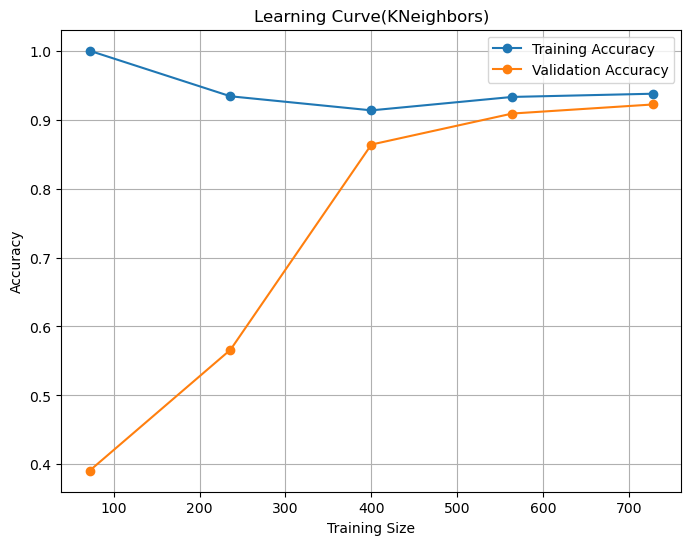

In [105]:

train_sizes, train_scores, test_scores = learning_curve(
    knn, x_resampled, y_resampled, cv=5, scoring='accuracy', n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curve(KNeighbors)')
plt.grid()
plt.show()


## DecisionTreeClassifier

In [107]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],     
    'min_samples_leaf': [1, 2, 4]     
}

dt = DecisionTreeClassifier(random_state=42)

grid_search_dt = GridSearchCV(estimator=dt, 
                              param_grid=param_grid_dt, 
                              cv=5, 
                              scoring='accuracy', 
                              n_jobs=-1, 
                              verbose=1)

grid_search_dt.fit(x_train, y_train)

print("Best Parameters: ", grid_search_dt.best_params_)

dt = grid_search_dt.best_estimator_

y_pred_dt_test = dt.predict(x_test)

y_pred_dt_train = dt.predict(x_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [108]:
dt_metrics=evaluate_model(y_test,y_pred_dt_test)
dt_metrics

{'accuracy': 0.916058394160584,
 'recall': 0.9213483146067416,
 'precision': 0.9479768786127167,
 'f1_score': 0.9344729344729344}

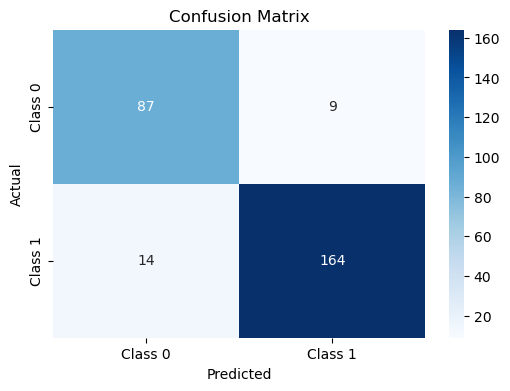

In [109]:
conf_matrix = confusion_matrix(y_test, y_pred_dt_test)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [110]:
print(classification_report(y_train, y_pred_dt_train))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       260
           1       0.99      0.97      0.98       377

    accuracy                           0.98       637
   macro avg       0.97      0.98      0.98       637
weighted avg       0.98      0.98      0.98       637



In [111]:
print(classification_report(y_test, y_pred_dt_test))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88        96
           1       0.95      0.92      0.93       178

    accuracy                           0.92       274
   macro avg       0.90      0.91      0.91       274
weighted avg       0.92      0.92      0.92       274



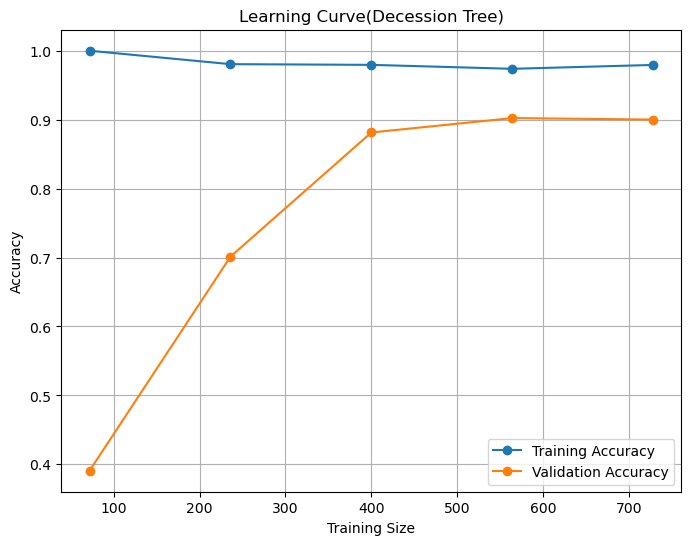

In [112]:

train_sizes, train_scores, test_scores = learning_curve(
    dt, x_resampled, y_resampled, cv=5, scoring='accuracy', n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curve(Decession Tree)')
plt.grid()
plt.show()


## GaussianNB

In [114]:
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  
}

nb = GaussianNB()

grid_search_nb = GridSearchCV(estimator=nb, 
                              param_grid=param_grid_nb, 
                              cv=5, 
                              scoring='accuracy', 
                              n_jobs=-1, 
                              verbose=1)

grid_search_nb.fit(x_train, y_train)

print("Best Parameters: ", grid_search_nb.best_params_)

nb = grid_search_nb.best_estimator_

y_pred_nb_test = nb.predict(x_test)

y_pred_nb_train = nb.predict(x_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters:  {'var_smoothing': 1e-09}


In [115]:
nb_metrics=evaluate_model(y_test,y_pred_nb_test)
nb_metrics

{'accuracy': 0.9343065693430657,
 'recall': 0.9831460674157303,
 'precision': 0.9210526315789473,
 'f1_score': 0.9510869565217391}

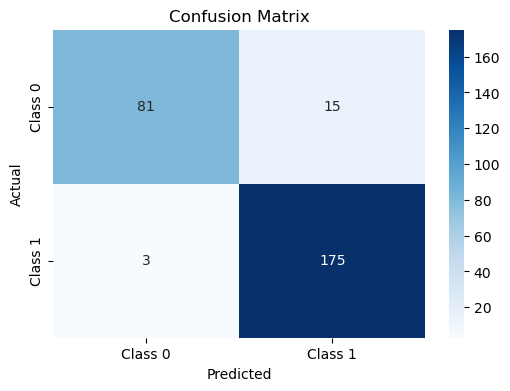

In [116]:
conf_matrix = confusion_matrix(y_test, y_pred_nb_test)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [117]:
print(classification_report(y_train, y_pred_nb_train))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       260
           1       0.94      0.98      0.96       377

    accuracy                           0.95       637
   macro avg       0.95      0.94      0.95       637
weighted avg       0.95      0.95      0.95       637



In [118]:
print(classification_report(y_test, y_pred_nb_test))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90        96
           1       0.92      0.98      0.95       178

    accuracy                           0.93       274
   macro avg       0.94      0.91      0.93       274
weighted avg       0.94      0.93      0.93       274



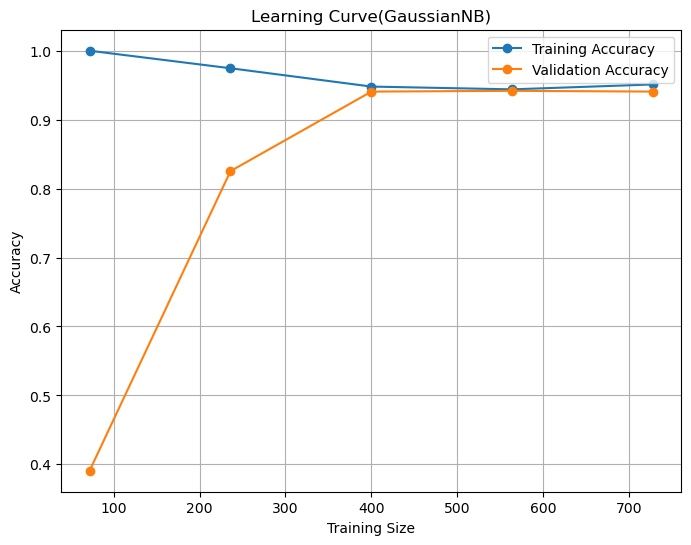

In [119]:

train_sizes, train_scores, test_scores = learning_curve(
    nb, x_resampled, y_resampled, cv=5, scoring='accuracy', n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curve(GaussianNB)')
plt.grid()
plt.show()


## Support Vecor Machine

In [121]:
param_grid_svc = {
    'C': [0.1, 1, 10, 100],               
    'kernel': ['linear', 'rbf', 'poly'],   
    'gamma': ['scale', 'auto']               
}

svc = SVC()

grid_search_svc = GridSearchCV(estimator=svc, 
                               param_grid=param_grid_svc, 
                               cv=5, 
                               scoring='accuracy', 
                               n_jobs=-1, 
                               verbose=1)

grid_search_svc.fit(x_train, y_train)

print("Best Parameters: ", grid_search_svc.best_params_)

svc = grid_search_svc.best_estimator_

y_pred_svc_test = svc.predict(x_test)

y_pred_svc_train = svc.predict(x_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [123]:
svc_metrics=evaluate_model(y_test,y_pred_svc_test)
svc_metrics

{'accuracy': 1.0, 'recall': 1.0, 'precision': 1.0, 'f1_score': 1.0}

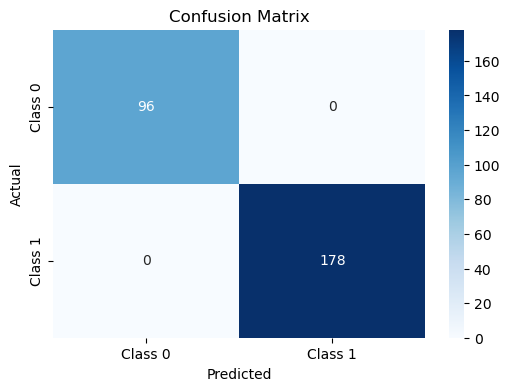

In [124]:
conf_matrix = confusion_matrix(y_test, y_pred_svc_test)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [125]:
print(classification_report(y_train, y_pred_svc_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       260
           1       1.00      1.00      1.00       377

    accuracy                           1.00       637
   macro avg       1.00      1.00      1.00       637
weighted avg       1.00      1.00      1.00       637



In [126]:
print(classification_report(y_test, y_pred_svc_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00       178

    accuracy                           1.00       274
   macro avg       1.00      1.00      1.00       274
weighted avg       1.00      1.00      1.00       274



C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
6 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\svm\_base.py", line 199, in fit
    y = self._validate_targets

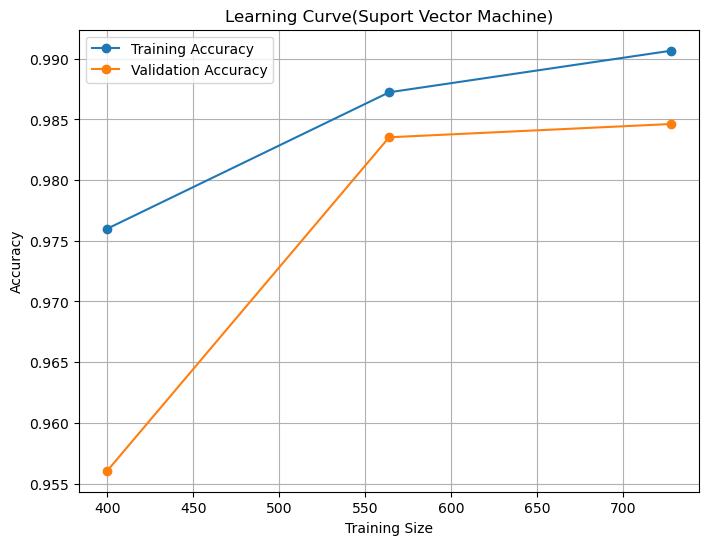

In [127]:
train_sizes, train_scores, test_scores = learning_curve(
    svc, x_resampled, y_resampled, cv=5, scoring='accuracy', n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curve(Suport Vector Machine)')
plt.grid()
plt.show()


## RandomForestRegressor

In [129]:
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400],        
    'max_depth': [None, 10, 20, 30],                
    'min_samples_split': [2, 5, 10],                 
    'min_samples_leaf': [1, 2, 4],                 
    'bootstrap': [True, False]                       
}

rf = RandomForestRegressor(random_state=42)

grid_search_rf = GridSearchCV(estimator=rf, 
                              param_grid=param_grid_rf, 
                              cv=5, 
                              scoring='neg_mean_squared_error',   
                              n_jobs=-1, 
                              verbose=1)

grid_search_rf.fit(x_train, y_train)

print("Best Parameters: ", grid_search_rf.best_params_)

rf = grid_search_rf.best_estimator_

y_pred_rf_test = rf.predict(x_test)

y_pred_rf_train = rf.predict(x_train)



Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Parameters:  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400}


In [130]:
y_pred_binary = (y_pred_rf_test >= 0.5).astype(int)

rf_metrics = evaluate_model(y_test, y_pred_binary)
rf_metrics

{'accuracy': 0.9598540145985401,
 'recall': 0.9719101123595506,
 'precision': 0.9664804469273743,
 'f1_score': 0.969187675070028}

In [131]:
def evaluate_model_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    
    r2 = r2_score(y_true, y_pred)
    
    print("MSE = :", mse)
    print("R² = :", r2)

y_pred_rf_test = rf.predict(x_test)

y_pred_rf_train = rf.predict(x_train)

print("  test evaluate  :")
evaluate_model_regression(y_test, y_pred_rf_test)

print(" train evaluate")
evaluate_model_regression(y_train, y_pred_rf_train)

  test evaluate  :
MSE = : 0.0375554451153398
R² = : 0.8350004331999502
 train evaluate
MSE = : 0.01626328942646799
R² = : 0.9326755898052592


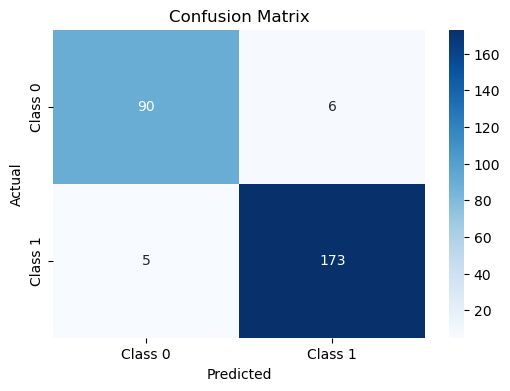

In [132]:
y_pred_rf_test_class = (y_pred_rf_test > 0.5).astype(int)  

conf_matrix = confusion_matrix(y_test, y_pred_rf_test_class)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [133]:
y_pred_rf_train_class = (y_pred_rf_train > 0.5).astype(int)
y_pred_rf_test_class = (y_pred_rf_test > 0.5).astype(int)

print("Classification Report (Training Data):")
print(classification_report(y_train, y_pred_rf_train_class))

print("Classification Report (Test Data):")
print(classification_report(y_test, y_pred_rf_test_class))

Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       260
           1       0.99      0.99      0.99       377

    accuracy                           0.99       637
   macro avg       0.99      0.99      0.99       637
weighted avg       0.99      0.99      0.99       637

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        96
           1       0.97      0.97      0.97       178

    accuracy                           0.96       274
   macro avg       0.96      0.95      0.96       274
weighted avg       0.96      0.96      0.96       274



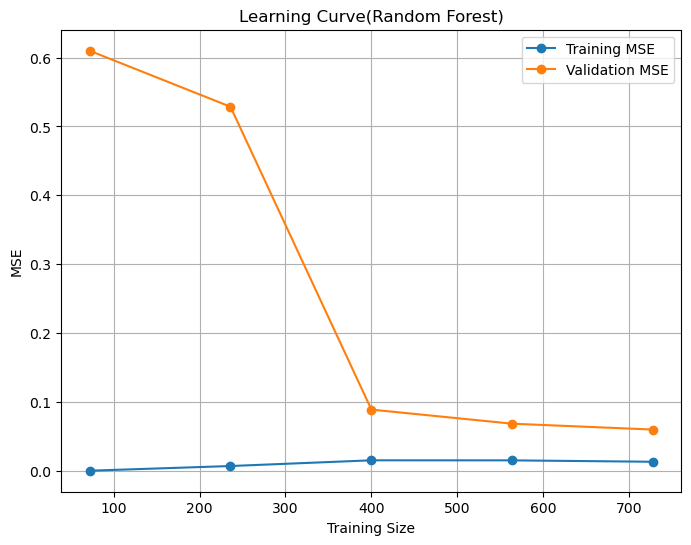

In [134]:
train_sizes, train_scores, test_scores = learning_curve(
    rf, x_resampled, y_resampled, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, -train_mean, label='Training MSE', marker='o')
plt.plot(train_sizes, -test_mean, label='Validation MSE', marker='o')
plt.xlabel('Training Size')
plt.ylabel('MSE')
plt.legend()
plt.title('Learning Curve(Random Forest)')
plt.grid(True)
plt.show()

## XGBoost 

In [136]:
param_grid_xgb = {
    'n_estimators': [50, 100, 200],          
    'learning_rate': [0.01, 0.1, 0.2],       
    'max_depth': [3, 6, 9],                   
    'subsample': [0.8, 0.9, 1.0],             
    'colsample_bytree': [0.8, 0.9, 1.0]     
}
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

grid_search_xgb = GridSearchCV(estimator=xgb, 
                               param_grid=param_grid_xgb, 
                               cv=5, 
                               scoring='accuracy', 
                               n_jobs=-1, 
                               verbose=1)

grid_search_xgb.fit(x_train, y_train)

print("Best Parameters: ", grid_search_xgb.best_params_)

xgb = grid_search_xgb.best_estimator_

y_pred_xgb_test = xgb.predict(x_test)

y_pred_xgb_train = xgb.predict(x_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


C:\Users\ahmed\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:54:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [137]:
xgb_metrics=evaluate_model(y_test,y_pred_xgb_test)
xgb_metrics

{'accuracy': 0.9963503649635036,
 'recall': 0.9943820224719101,
 'precision': 1.0,
 'f1_score': 0.9971830985915493}

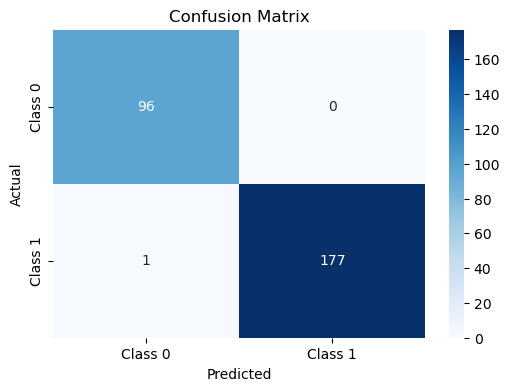

In [138]:
conf_matrix = confusion_matrix(y_test, y_pred_xgb_test)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [139]:
print(classification_report(y_train, y_pred_xgb_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       260
           1       1.00      1.00      1.00       377

    accuracy                           1.00       637
   macro avg       1.00      1.00      1.00       637
weighted avg       1.00      1.00      1.00       637



In [140]:
print(classification_report(y_test, y_pred_xgb_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        96
           1       1.00      0.99      1.00       178

    accuracy                           1.00       274
   macro avg       0.99      1.00      1.00       274
weighted avg       1.00      1.00      1.00       274



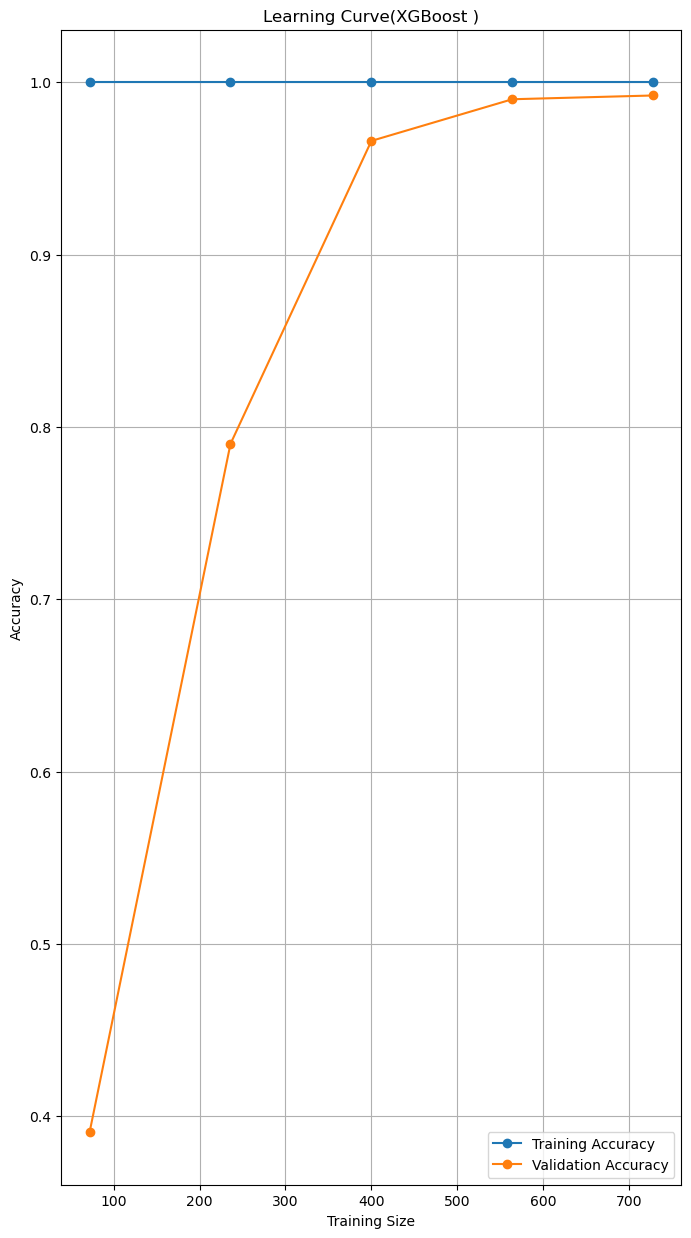

In [141]:

train_sizes, train_scores, test_scores = learning_curve(
    xgb, x_resampled, y_resampled, cv=5, scoring='accuracy', n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(8, 15))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curve(XGBoost )')
plt.grid()
plt.show()

## GradientBoostingRegressor

In [143]:
param_grid_gb = {
    'n_estimators': [50, 100, 200],     
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 6, 9],                  
    'subsample': [0.8, 0.9, 1.0],             
    'min_samples_split': [2, 5, 10]          
}
gb = GradientBoostingRegressor()

grid_search_gb = GridSearchCV(estimator=gb, 
                              param_grid=param_grid_gb, 
                              cv=5, 
                              scoring='neg_mean_squared_error',    
                              n_jobs=-1, 
                              verbose=1)

grid_search_gb.fit(x_train, y_train)

print("Best Parameters: ", grid_search_gb.best_params_)

gb = grid_search_gb.best_estimator_
y_pred_gb_test = gb.predict(x_test)

y_pred_gb_train = gb.predict(x_train)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters:  {'learning_rate': 0.05, 'max_depth': 9, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 0.8}


In [144]:
y_pred_binary = (y_pred_gb_test >= 0.5).astype(int)

gb_metrics = evaluate_model(y_test, y_pred_binary)
gb_metrics

{'accuracy': 0.9598540145985401,
 'recall': 0.9719101123595506,
 'precision': 0.9664804469273743,
 'f1_score': 0.969187675070028}

In [145]:
mse_test = mean_squared_error(y_test, y_pred_gb_test)
r2_test = r2_score(y_test, y_pred_gb_test)

mse_train = mean_squared_error(y_train, y_pred_gb_train)
r2_train = r2_score(y_train, y_pred_gb_train)

print(f"Train MSE: {mse_train}, Train R²: {r2_train}")
print(f"Test MSE: {mse_test}, Test R²: {r2_test}")

Train MSE: 0.0024886412249127284, Train R²: 0.9896978834810078
Test MSE: 0.03048319043328537, Test R²: 0.8660723311698658


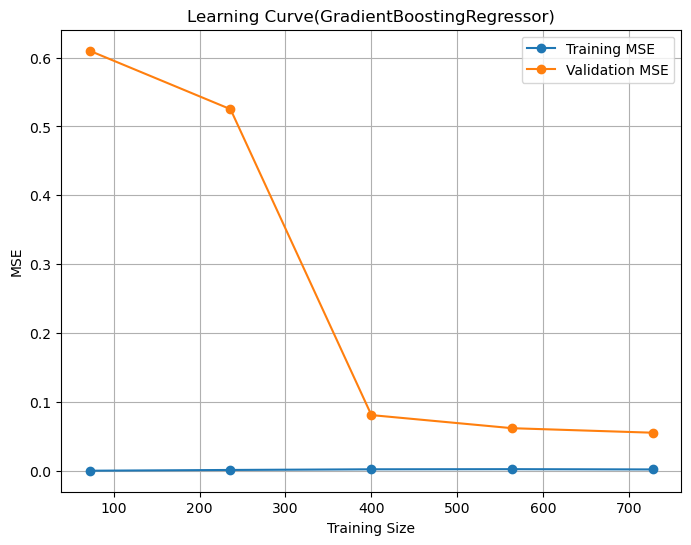

In [146]:

train_sizes, train_scores, test_scores = learning_curve(
    gb, x_resampled, y_resampled, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, -train_mean, label='Training MSE', marker='o')
plt.plot(train_sizes, -test_mean, label='Validation MSE', marker='o')
plt.xlabel('Training Size')
plt.ylabel('MSE')
plt.legend()
plt.title('Learning Curve(GradientBoostingRegressor)')
plt.grid(True)
plt.show()


## AdaBoostClassifier

In [148]:
param_grid_ada = {
    'n_estimators': [50, 100, 200],           
    'learning_rate': [0.01, 0.1, 0.5, 1.0],  
    'algorithm': ['SAMME', 'SAMME.R']         
}

ada = AdaBoostClassifier()

grid_search_ada = GridSearchCV(estimator=ada,
                               param_grid=param_grid_ada,
                               cv=5,
                               scoring='accuracy',
                               n_jobs=-1,
                               verbose=1)

grid_search_ada.fit(x_train, y_train)

print("Best Parameters: ", grid_search_ada.best_params_)

ada = grid_search_ada.best_estimator_

y_pred_ada_test = ada.predict(x_test)
y_pred_ada_train = ada.predict(x_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters:  {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 200}


In [151]:
ada_metrics=evaluate_model(y_test,y_pred_ada_test)
ada_metrics

{'accuracy': 1.0, 'recall': 1.0, 'precision': 1.0, 'f1_score': 1.0}

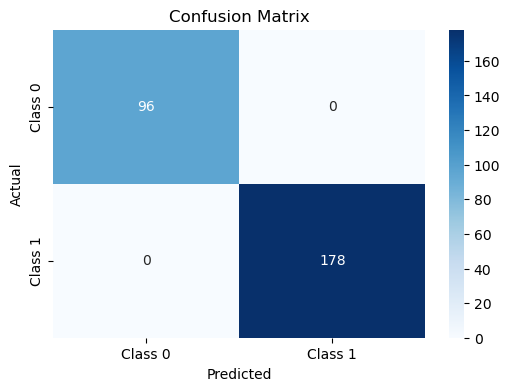

In [152]:
conf_matrix = confusion_matrix(y_test, y_pred_ada_test)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [153]:
print(classification_report(y_train, y_pred_ada_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       260
           1       1.00      1.00      1.00       377

    accuracy                           1.00       637
   macro avg       1.00      1.00      1.00       637
weighted avg       1.00      1.00      1.00       637



In [154]:
print(classification_report(y_test, y_pred_ada_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00       178

    accuracy                           1.00       274
   macro avg       1.00      1.00      1.00       274
weighted avg       1.00      1.00      1.00       274



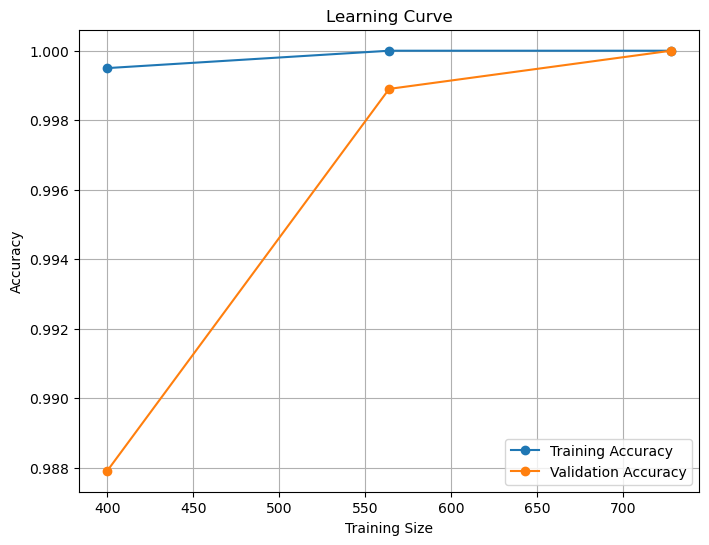

In [155]:

train_sizes, train_scores, test_scores = learning_curve(
    ada, x_resampled, y_resampled, cv=5, scoring='accuracy', n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curve')
plt.grid()
plt.show()


## Artificial Neural Network¶


In [157]:
NN = Sequential()
NN.add(Dense(32, activation="relu", input_dim=10))

NN.add(Dense(16, activation="relu"))
NN.add(Dense(1, activation="sigmoid"))

NN.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=None
)
history = NN.fit(x_train, y_train, batch_size=10, epochs=300, validation_split=0.2, callbacks=callback)

C:\Users\ahmed\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 10, but received input with shape (None, 14)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 14), dtype=float32)
  • training=True
  • mask=None

In [ ]:
print(x_train.shape)


In [ ]:
figure = plt.subplots(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()

In [ ]:
y_pred_nn = NN.predict(x_test)
y_pred_binary_nn = (y_pred_nn >= 0.5).astype(int)

In [ ]:
nn_metrics = evaluate_model(y_test, y_pred_binary_nn)
print(nn_metrics)

In [ ]:
models = ['lr', 'lda', 'knn','dt','nb',
        'svc','rf','xgb','gb','ada','NN']
metrics = ['accuracy', 'recall', 'precision', 'f1_score']
results = {
    'lr': lr_metrics,
    'lda': lda_metrics,
    'knn': knn_metrics,
    'dt':dt_metrics,
    'nb':nb_metrics,
    'svc':svc_metrics,
    'rf':rf_metrics,
    'xgb':xgb_metrics,
    'gb':gb_metrics,
    'ada':ada_metrics,
    "NN":nn_metrics
    
    
    
    
    
}

data = {metric: [results[model][metric] for model in models] for metric in metrics}

colors = sns.color_palette("tab10", len(models))  

for metric, values in data.items():
    plt.figure(figsize=(10, 6))  
    plt.bar(models, values, color=colors)
    plt.title(f'{metric.capitalize()} Comparison', fontsize=16)
    plt.xlabel('Models', fontsize=14)
    plt.ylabel(metric.capitalize(), fontsize=14)
    plt.ylim(0, 1) 
    plt.xticks(rotation=45)  
    plt.grid(axis='y', linestyle='--', alpha=0.7)  
    plt.show()


## Load model and scaler

In [ ]:
with open("autism_model.pkl", "wb") as file:
    pickle.dump(lr, file)

In [ ]:
with open("autism_scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)